In [11]:
from deal import buy_fund, rebalance_buy
from load_ts import pick_csv_data
from risk_return import anualized_return, anualized_risk

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
conditions = [[{ 'ｅＭＡＸＩＳ　Ｓｌｉｍ全世界株式（オール・カントリー）':p
               , 'ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）':(10-p)
               }  # portfolio
               , list(range(1,13))  # 購入月
               , 1  # 購入金額
               , f'ACWI {p}:GLD {10-p}'  # 条件名
              ] for p in range(1,10)
             ]

/tmp/ipykernel_7923/3976615734.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount
/home/hada/workspace/portfolio/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hada/workspace/portfolio/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hada/workspace/portfolio/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

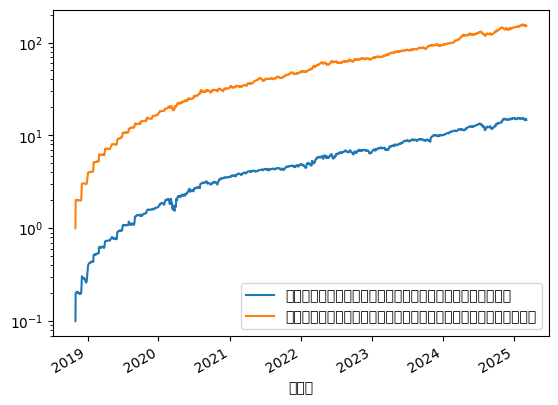

In [12]:
condition = conditions[0]

close_df, _ = pick_csv_data(condition[0].keys())
portfolio = pd.Series(condition[0])/sum(condition[0].values())

buy_monthes = condition[1]
buy_amount = condition[2]
name = condition[3]
prev = -1

result = close_df * 0  # 現在資産
buy_history = close_df * 0  # 投資記録

for t,v in close_df.iterrows():
    if t.month != prev:
        # reset behavior
        bought = False
        rebalanced = False
        prev = t.month
    if t.month in buy_monthes:
        if not bought:
            # 現在資産比率に基づき購買比率を決定する
            buy_rate = rebalance_buy(result.loc[t], portfolio, buy_amount)
            buy_history.loc[t] += buy_rate*buy_amount
            # buy_fundで、今買った投信の将来の値動きをベクタとして取得、ポートフォリオ比率をかけて購入後の値動きを結果時系列に加算
            result = result.add(buy_fund(close_df, t)*buy_rate*buy_amount, fill_value=0)  # 現在資産に買った投信を加算
            bought = True

result.loc[datetime.datetime(2018,1,1):].plot(logy=True, stacked=True)
plt.show()
plt.close('all')


In [4]:
anualized_return(close_df, period=12)

ｅＭＡＸＩＳ　Ｓｌｉｍ全世界株式（オール・カントリー）       0.139453
ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）    0.386275
dtype: float64

In [5]:
anualized_risk(close_df, period=12)

ｅＭＡＸＩＳ　Ｓｌｉｍ全世界株式（オール・カントリー）       0.153269
ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）    0.149812
dtype: float64

In [19]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])